In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline

def f_time(c, r):
    return (1/c) * np.log(1/r)

def create_graph(t):
    plt.xlim((0, t*2))
    plt.ylim((0, 2))
    plt.plot([0, t, t, 2], [1, 1, 0, 0])
    plt.show()

# G est un tableau de valeur trié par ordre croissant
def create_multi_graphs(g):
    g = np.sort(g)
    x = g
    y = []
    for i in range(len(x)):
        y.append(1 - (i / x.size))

    plt.xlim((0, np.max(x)*1.1))
    plt.ylim((0, 2))
        
    # Ajout du premier point
    y = np.concatenate((np.array([1]), y))
    x = np.concatenate((np.array([0]), x))
        
    # Ajout du dernier point
    y = np.concatenate((y, (np.array([0]))))
    x = np.concatenate((x, (np.array([x[x.size-1]]))))  
        
    plt.step(x, y)
    plt.show()


In [45]:
# Fonction de création d'un graphe pendant simulation
def graph_simu(time_tab, q_tab):
    evolution = {}
    for m in q_tab[0]:
        evolution[m] = []

    for m in q_tab[0]:
        for q in q_tab:
            evolution[m].append(q[m])
    
    for i in evolution:
        plt.plot(time_tab, evolution[i], linewidth=3)
    
    plt.ylim([0, 10000])
    plt.xlim([0, 0.001])
    plt.show()

# Structure pour une réaction
class SystemReact:
    
    def __init__(self):
        self.reacts = []

    # Ajout de réaction
    def add_react(self, react):
        self.reacts.append(react)

    def possible(self):
        possible = False
        for r in self.reacts:
            if r.possible():
                possible = True
                break
        return possible
        
    # Simulation de base avec une quantité
    # quantities -> dict
    def simulation(self, quantities):
        cpt_react = []

        # On met les quantités aux réactions
        for r in self.reacts:
            cpt_react.append(0)
            r.quantities = quantities

        # Step0: On initialise les variables utiles
        t_tab = [0]
        quantities_tab = []
        quantities_tab.append(quantities.copy())
        t   = 0
        cpt = 0
        keep_going = True
        
        while keep_going:
            # On teste si il est possible d'avoir au moins
            # une réaction
            if not self.possible():
                break

            # Step1: On calcule les a = h * c de chaque réaction
            a = []
            for r in self.reacts:
                inter_h = 1
                for rea in r.reagents:
                    # Si c'est > 3 ATTENTION BUG
                    if quantities[rea] > 1:
                        inter_h *= (quantities[rea] * (quantities[rea] - 1))/r.reagents[rea]
                    else:
                        inter_h *= quantities[rea]
                        
                a.append(inter_h * r.c)

            a0 = np.sum(a)

            # Step2: random 
            r1 = np.random.random()
            r2 = np.random.random()

            to = f_time(a0, r1)

            current_react = None
            proba = 0

            # Choix d'une réaction
            k = 0
            for i in range(len(self.reacts)):
                print("{} : {}".format(i, a[i]/a0))
            for i in range(len(self.reacts)):
                k = i
                current_react = self.reacts[i]
                proba += a[i]/a0
                if proba >= r2:
                    break

            cpt_react[k] += 1
            keep_going = current_react.do()

            t_tab.append(t)
            quantities_tab.append(quantities.copy())
            t += to
            cpt += 1
            print(cpt_react)

        return t_tab, quantities_tab
        
class React:
    
    # reagents : {'A': 2, 'B': 1}
    # products : {'C': 1}
    def __init__(self, reagents, products, c):
        self.reagents = reagents
        self.products = products
        self.c = c
        self.quantities = {}
    
    # Teste si la réaction est possible
    def possible(self):
        # Regarde si il y a assez de réactif
        needed = True
        for r in self.reagents:
            if self.quantities[r] < self.reagents[r]:
                needed = False
                break
        
        # S'il n'y en a pas assez, on renvoie faux
        return needed
    
    # Applique une fois la réaction
    def do(self):
        # Si on peut pas la déclencher
        if not self.possible():
            return False
    
        # Sinon on applique la réaction
        for r in self.reagents:
            self.quantities[r] -= self.reagents[r]
        for p in self.products:
            self.quantities[p] += self.products[p]

        return True


c: 1 et n: 10


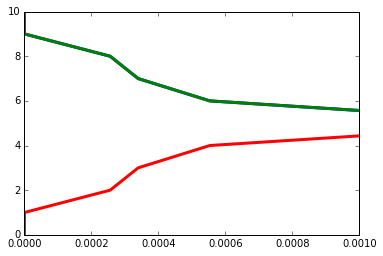

c: 1 et n: 100


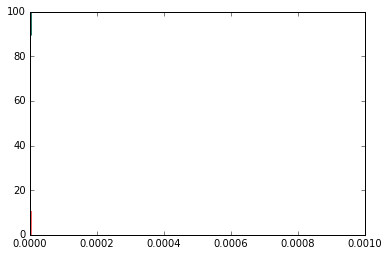

c: 1 et n: 10000


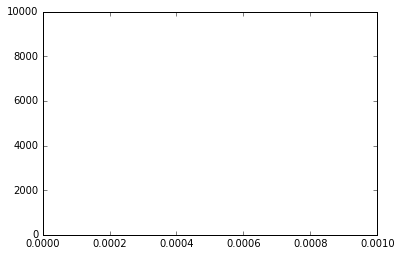

c: 1 et n: 1000000


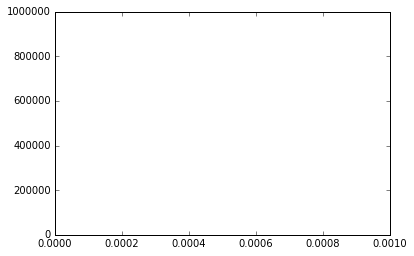

c: 10 et n: 10


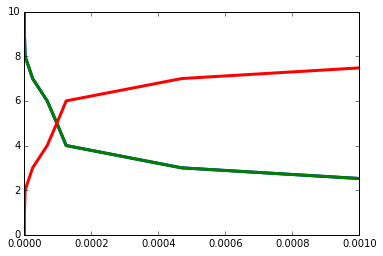

c: 10 et n: 100


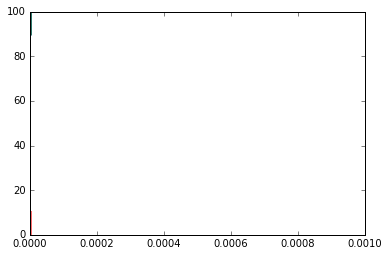

c: 10 et n: 10000


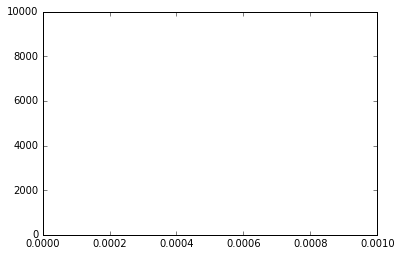

c: 10 et n: 1000000


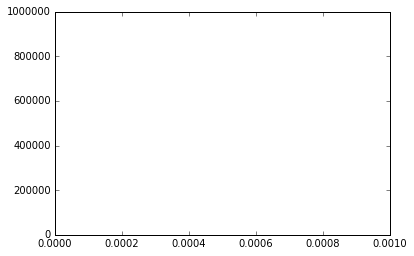

In [3]:
reagents   = {'A': 1, 'B': 1}
products   = {'C': 1}

cs = [1, 10]
nb = [10, 100, 10**4, 10**6]

for c in cs:
    for n in nb:
        quantities = {'A': n, 'B': n, 'C': 0}
        s = SystemReact()
        r = React(reagents, products, c)
        s.add_react(r)
        time_tab, q_tab = s.simulation(quantities)
        print("c: {} et n: {}".format(c, n))
        graph_simu(time_tab, q_tab)

c: 1


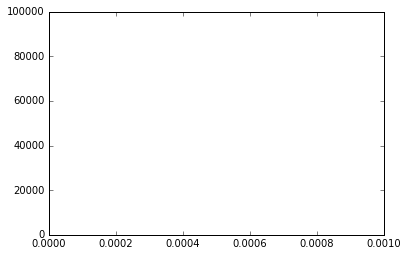

In [4]:
reagents   = {'A': 1, 'B': 1}
products   = {'A': 1, 'C': 1}

c = 1

quantities = {'A': 1, 'B': 10**5, 'C': 0}
s = SystemReact()
r = React(reagents, products, c)
s.add_react(r)
time_tab, q_tab = s.simulation(quantities)
print("c: {}".format(c))
graph_simu(time_tab, q_tab)

c: 1


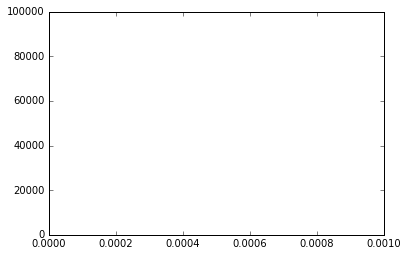

In [5]:
reagents   = {'A': 1}
products   = {'B': 1}

c = 1

quantities = {'A': 10**5, 'B': 0}
s = SystemReact()
r = React(reagents, products, c)
s.add_react(r)
time_tab, q_tab = s.simulation(quantities)
print("c: {}".format(c))
graph_simu(time_tab, q_tab)

In [ ]:
reagents_r1 = {'Y1': 1}
products_r1 = {'Y1': 2}

reagents_r2 = {'Y1': 1, 'Y2': 1}
products_r2 = {'Y2': 2}

reagents_r3 = {'Y2': 1}
products_r3 = {'Z': 1}

quantities = {'Y1': 1000, 'Y2': 1000, 'Z': 0}
s = SystemReact()
r1 = React(reagents_r1, products_r1, 0.0002)
r2 = React(reagents_r2, products_r2, 0.01)
r3 = React(reagents_r3, products_r3, 10)
s.add_react(r1)
s.add_react(r2)
s.add_react(r3)
time_tab, q_tab = s.simulation(quantities)
print("c: {}".format(c))
graph_simu(time_tab, q_tab)

0 : 1.999999960000001e-08
1 : 0.9989999800200005
2 : 0.0009999999800000005
[0, 1, 0]
0 : 1.995999956163845e-08
1 : 0.9989979780600043
2 : 0.0010020019799960324
[0, 2, 0]
0 : 1.9920119203827647e-08
1 : 0.9989959700838769
2 : 0.0010040099960039203
[0, 3, 0]
0 : 1.9880358048956888e-08
1 : 0.9989939560674981
2 : 0.0010060240521438796
[0, 4, 0]
0 : 1.9840715621792537e-08
1 : 0.9989919359866273
2 : 0.0010080441726570879
[0, 5, 0]
0 : 1.980119144946388e-08
1 : 0.9989899098169022
2 : 0.0010100703819064156
[0, 6, 0]
0 : 1.9761785061448974e-08
1 : 0.9989878775338378
2 : 0.001012102704377157
[0, 7, 0]
0 : 1.9722495989560675e-08
1 : 0.9989858391128262
2 : 0.0010141411646777709
[0, 8, 0]
0 : 1.9683323767932718e-08
1 : 0.9989837945291355
2 : 0.0010161857875406232
[0, 9, 0]
0 : 1.9644267933005907e-08
1 : 0.9989817437579093
2 : 0.0010182365978227371
[0, 10, 0]
0 : 1.9605328023514417e-08
1 : 0.9989796867741654
2 : 0.0010202936205065472
[0, 11, 0]
0 : 1.9566503580472148e-08
1 : 0.9989776235527958
2 : 0.

[0, 834, 5]
0 : 5.771208119882498e-09
1 : 0.9647763241256291
2 : 0.035223670103162796
[0, 835, 5]
0 : 5.762425498704181e-09
1 : 0.9643620756973902
2 : 0.03563791854018441
[0, 836, 5]
0 : 5.75361529290583e-09
1 : 0.9639405685199176
2 : 0.036059425726467066
[0, 837, 5]
0 : 5.744776604831808e-09
1 : 0.9635116342517488
2 : 0.036488360003474545
[0, 838, 5]
0 : 5.735908512019093e-09
1 : 0.9630750997118394
2 : 0.0369248945522521
[0, 839, 5]
0 : 5.7270100663541396e-09
1 : 0.9626307867142087
2 : 0.03736920755878139
[0, 840, 5]
0 : 5.718080293196734e-09
1 : 0.962178511896068
2 : 0.03782148238585173
[0, 841, 5]
0 : 5.709118190469416e-09
1 : 0.9617180865391445
2 : 0.0382819077517373
[0, 842, 5]
0 : 5.700122727710909e-09
1 : 0.9612493163838935
2 : 0.03875067791598377
[0, 843, 5]
0 : 5.691092845091996e-09
1 : 0.9607720014362842
2 : 0.03922799287262307
[0, 844, 5]
0 : 5.682027452392113e-09
1 : 0.960285935766822
2 : 0.039714058551150615
[0, 845, 5]
0 : 5.67292542793495e-09
1 : 0.9597909073014583
2 : 0

0 : 5.829181716909744e-11
1 : 0.0059642147113819575
2 : 0.9940357852303263
[0, 997, 567]
0 : 5.837340123790877e-11
1 : 0.00596421471138147
2 : 0.994035785230245
[0, 997, 568]
0 : 5.845515670182262e-11
1 : 0.0059642147113809834
2 : 0.9940357852301638
[0, 997, 569]
0 : 5.853708404127378e-11
1 : 0.005964214711380494
2 : 0.9940357852300824
[0, 997, 570]
0 : 5.861918373838156e-11
1 : 0.005964214711380005
2 : 0.9940357852300009
[0, 997, 571]
0 : 5.870145627695691e-11
1 : 0.005964214711379513
2 : 0.994035785229919
[0, 997, 572]
0 : 5.878390214250959e-11
1 : 0.005964214711379022
2 : 0.994035785229837
[0, 997, 573]
0 : 5.886652182225527e-11
1 : 0.00596421471137853
2 : 0.994035785229755
[0, 997, 574]
0 : 5.894931580512276e-11
1 : 0.005964214711378035
2 : 0.9940357852296726
[0, 997, 575]
0 : 5.903228458176125e-11
1 : 0.005964214711377541
2 : 0.9940357852295901
[0, 997, 576]
0 : 5.911542864454753e-11
1 : 0.005964214711377045
2 : 0.9940357852295075
[0, 997, 577]
0 : 5.919874848759341e-11
1 : 0.0059

0 : 7.912691175037037e-11
1 : 0.0009990009989219511
2 : 0.999000998921951
[0, 999, 1497]
0 : 7.944278764555634e-11
1 : 0.0009990009989216356
2 : 0.9990009989216355
[0, 999, 1498]
0 : 7.976055879611322e-11
1 : 0.0009990009989213182
2 : 0.9990009989213181
[0, 999, 1499]
0 : 8.008024039446884e-11
1 : 0.0009990009989209988
2 : 0.9990009989209987
[0, 999, 1500]
0 : 8.040184778558542e-11
1 : 0.0009990009989206774
2 : 0.9990009989206774
[0, 999, 1501]
0 : 8.07253964688011e-11
1 : 0.000999000998920354
2 : 0.9990009989203542
[0, 999, 1502]
0 : 8.105090209969731e-11
1 : 0.000999000998920029
2 : 0.9990009989200291
[0, 999, 1503]
0 : 8.137838049199267e-11
1 : 0.000999000998919702
2 : 0.999000998919702
[0, 999, 1504]
0 : 8.17078476194637e-11
1 : 0.0009990009989193729
2 : 0.9990009989193728
[0, 999, 1505]
0 : 8.203931961789273e-11
1 : 0.0009990009989190416
2 : 0.9990009989190416
[0, 999, 1506]
0 : 8.237281278704369e-11
1 : 0.0009990009989187085
2 : 0.9990009989187084
[0, 999, 1507]
0 : 8.27083435926

1 : 0.0
2 : 0.0
[395, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[396, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[397, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[398, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[399, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[400, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[401, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[402, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[403, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[404, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[405, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[406, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[407, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[408, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[409, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[410, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[411, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[412, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[413, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[414, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[415, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[416, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[417, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[418, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0


2 : 0.0
[1280, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[1281, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[1282, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[1283, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[1284, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[1285, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[1286, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[1287, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[1288, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[1289, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[1290, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[1291, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[1292, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[1293, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[1294, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[1295, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[1296, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[1297, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[1298, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[1299, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[1300, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[1301, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[1302, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[1303, 999, 1999]
0 : 1.0


[2169, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[2170, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[2171, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[2172, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[2173, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[2174, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[2175, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[2176, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[2177, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[2178, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[2179, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[2180, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[2181, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[2182, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[2183, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[2184, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[2185, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[2186, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[2187, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[2188, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[2189, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[2190, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[2191, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[2192, 999, 1999]
0 : 1.0
1 : 0.0


[3076, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3077, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3078, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3079, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3080, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3081, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3082, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3083, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3084, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3085, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3086, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3087, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3088, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3089, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3090, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3091, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3092, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3093, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3094, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3095, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3096, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3097, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3098, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3099, 999, 1999]
0 : 1.0
1 : 0.0


2 : 0.0
[3926, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3927, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3928, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3929, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3930, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3931, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3932, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3933, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3934, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3935, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3936, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3937, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3938, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3939, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3940, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3941, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3942, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3943, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3944, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3945, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3946, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3947, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3948, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[3949, 999, 1999]
0 : 1.0


1 : 0.0
2 : 0.0
[4783, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[4784, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[4785, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[4786, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[4787, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[4788, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[4789, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[4790, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[4791, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[4792, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[4793, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[4794, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[4795, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[4796, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[4797, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[4798, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[4799, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[4800, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[4801, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[4802, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[4803, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[4804, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[4805, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[4806, 999, 1999]


2 : 0.0
[5646, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[5647, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[5648, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[5649, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[5650, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[5651, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[5652, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[5653, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[5654, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[5655, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[5656, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[5657, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[5658, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[5659, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[5660, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[5661, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[5662, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[5663, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[5664, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[5665, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[5666, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[5667, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[5668, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[5669, 999, 1999]
0 : 1.0


[6509, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[6510, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[6511, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[6512, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[6513, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[6514, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[6515, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[6516, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[6517, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[6518, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[6519, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[6520, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[6521, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[6522, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[6523, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[6524, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[6525, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[6526, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[6527, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[6528, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[6529, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[6530, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[6531, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[6532, 999, 1999]
0 : 1.0
1 : 0.0


[7357, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[7358, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[7359, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[7360, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[7361, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[7362, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[7363, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[7364, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[7365, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[7366, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[7367, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[7368, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[7369, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[7370, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[7371, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[7372, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[7373, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[7374, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[7375, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[7376, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[7377, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[7378, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[7379, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[7380, 999, 1999]
0 : 1.0
1 : 0.0


[8068, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[8069, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[8070, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[8071, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[8072, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[8073, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[8074, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[8075, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[8076, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[8077, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[8078, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[8079, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[8080, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[8081, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[8082, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[8083, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[8084, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[8085, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[8086, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[8087, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[8088, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[8089, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[8090, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[8091, 999, 1999]
0 : 1.0
1 : 0.0


1 : 0.0
2 : 0.0
[9127, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[9128, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[9129, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[9130, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[9131, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[9132, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[9133, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[9134, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[9135, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[9136, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[9137, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[9138, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[9139, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[9140, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[9141, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[9142, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[9143, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[9144, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[9145, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[9146, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[9147, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[9148, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[9149, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[9150, 999, 1999]


2 : 0.0
[10049, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[10050, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[10051, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[10052, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[10053, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[10054, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[10055, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[10056, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[10057, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[10058, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[10059, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[10060, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[10061, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[10062, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[10063, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[10064, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[10065, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[10066, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[10067, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[10068, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[10069, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[10070, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[10071, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[10

1 : 0.0
2 : 0.0
[11004, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11005, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11006, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11007, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11008, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11009, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11010, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11011, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11012, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11013, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11014, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11015, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11016, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11017, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11018, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11019, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11020, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11021, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11022, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11023, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11024, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11025, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11026, 999, 1999]
0 : 1.0
1 : 0.0
2 :

2 : 0.0
[11819, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11820, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11821, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11822, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11823, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11824, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11825, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11826, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11827, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11828, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11829, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11830, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11831, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11832, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11833, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11834, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11835, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11836, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11837, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11838, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11839, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11840, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11841, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[11

1 : 0.0
2 : 0.0
[12730, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[12731, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[12732, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[12733, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[12734, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[12735, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[12736, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[12737, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[12738, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[12739, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[12740, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[12741, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[12742, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[12743, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[12744, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[12745, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[12746, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[12747, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[12748, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[12749, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[12750, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[12751, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[12752, 999, 1999]
0 : 1.0
1 : 0.0
2 :

2 : 0.0
[13501, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[13502, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[13503, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[13504, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[13505, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[13506, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[13507, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[13508, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[13509, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[13510, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[13511, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[13512, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[13513, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[13514, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[13515, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[13516, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[13517, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[13518, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[13519, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[13520, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[13521, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[13522, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[13523, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[13

1 : 0.0
2 : 0.0
[14346, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[14347, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[14348, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[14349, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[14350, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[14351, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[14352, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[14353, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[14354, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[14355, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[14356, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[14357, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[14358, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[14359, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[14360, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[14361, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[14362, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[14363, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[14364, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[14365, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[14366, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[14367, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[14368, 999, 1999]
0 : 1.0
1 : 0.0
2 :

1 : 0.0
2 : 0.0
[15184, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[15185, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[15186, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[15187, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[15188, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[15189, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[15190, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[15191, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[15192, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[15193, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[15194, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[15195, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[15196, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[15197, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[15198, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[15199, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[15200, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[15201, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[15202, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[15203, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[15204, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[15205, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[15206, 999, 1999]
0 : 1.0
1 : 0.0
2 :

1 : 0.0
2 : 0.0
[16034, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16035, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16036, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16037, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16038, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16039, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16040, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16041, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16042, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16043, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16044, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16045, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16046, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16047, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16048, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16049, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16050, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16051, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16052, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16053, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16054, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16055, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16056, 999, 1999]
0 : 1.0
1 : 0.0
2 :

2 : 0.0
[16859, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16860, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16861, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16862, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16863, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16864, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16865, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16866, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16867, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16868, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16869, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16870, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16871, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16872, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16873, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16874, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16875, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16876, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16877, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16878, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16879, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16880, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16881, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[16

1 : 0.0
2 : 0.0
[17750, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[17751, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[17752, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[17753, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[17754, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[17755, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[17756, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[17757, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[17758, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[17759, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[17760, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[17761, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[17762, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[17763, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[17764, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[17765, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[17766, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[17767, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[17768, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[17769, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[17770, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[17771, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[17772, 999, 1999]
0 : 1.0
1 : 0.0
2 :

[18672, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[18673, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[18674, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[18675, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[18676, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[18677, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[18678, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[18679, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[18680, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[18681, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[18682, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[18683, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[18684, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[18685, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[18686, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[18687, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[18688, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[18689, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[18690, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[18691, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[18692, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[18693, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[18694, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[18695, 999

0 : 1.0
1 : 0.0
2 : 0.0
[19506, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[19507, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[19508, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[19509, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[19510, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[19511, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[19512, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[19513, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[19514, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[19515, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[19516, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[19517, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[19518, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[19519, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[19520, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[19521, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[19522, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[19523, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[19524, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[19525, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[19526, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[19527, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[19528, 999, 1999]
0 : 1.0
1 :

[20356, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[20357, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[20358, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[20359, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[20360, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[20361, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[20362, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[20363, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[20364, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[20365, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[20366, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[20367, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[20368, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[20369, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[20370, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[20371, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[20372, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[20373, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[20374, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[20375, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[20376, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[20377, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[20378, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[20379, 999

[21197, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[21198, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[21199, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[21200, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[21201, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[21202, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[21203, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[21204, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[21205, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[21206, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[21207, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[21208, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[21209, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[21210, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[21211, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[21212, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[21213, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[21214, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[21215, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[21216, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[21217, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[21218, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[21219, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[21220, 999

0 : 1.0
1 : 0.0
2 : 0.0
[22049, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22050, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22051, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22052, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22053, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22054, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22055, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22056, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22057, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22058, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22059, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22060, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22061, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22062, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22063, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22064, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22065, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22066, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22067, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22068, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22069, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22070, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22071, 999, 1999]
0 : 1.0
1 :

2 : 0.0
[22891, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22892, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22893, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22894, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22895, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22896, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22897, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22898, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22899, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22900, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22901, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22902, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22903, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22904, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22905, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22906, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22907, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22908, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22909, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22910, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22911, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22912, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22913, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[22

1 : 0.0
2 : 0.0
[23682, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[23683, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[23684, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[23685, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[23686, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[23687, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[23688, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[23689, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[23690, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[23691, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[23692, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[23693, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[23694, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[23695, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[23696, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[23697, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[23698, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[23699, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[23700, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[23701, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[23702, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[23703, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[23704, 999, 1999]
0 : 1.0
1 : 0.0
2 :

2 : 0.0
[24644, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[24645, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[24646, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[24647, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[24648, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[24649, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[24650, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[24651, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[24652, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[24653, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[24654, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[24655, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[24656, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[24657, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[24658, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[24659, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[24660, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[24661, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[24662, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[24663, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[24664, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[24665, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[24666, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[24

[25575, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[25576, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[25577, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[25578, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[25579, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[25580, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[25581, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[25582, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[25583, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[25584, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[25585, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[25586, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[25587, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[25588, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[25589, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[25590, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[25591, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[25592, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[25593, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[25594, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[25595, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[25596, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[25597, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[25598, 999

0 : 1.0
1 : 0.0
2 : 0.0
[26339, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[26340, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[26341, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[26342, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[26343, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[26344, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[26345, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[26346, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[26347, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[26348, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[26349, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[26350, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[26351, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[26352, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[26353, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[26354, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[26355, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[26356, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[26357, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[26358, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[26359, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[26360, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[26361, 999, 1999]
0 : 1.0
1 :

[27418, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[27419, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[27420, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[27421, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[27422, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[27423, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[27424, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[27425, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[27426, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[27427, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[27428, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[27429, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[27430, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[27431, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[27432, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[27433, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[27434, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[27435, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[27436, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[27437, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[27438, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[27439, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[27440, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[27441, 999

0 : 1.0
1 : 0.0
2 : 0.0
[28251, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[28252, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[28253, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[28254, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[28255, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[28256, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[28257, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[28258, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[28259, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[28260, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[28261, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[28262, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[28263, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[28264, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[28265, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[28266, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[28267, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[28268, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[28269, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[28270, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[28271, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[28272, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[28273, 999, 1999]
0 : 1.0
1 :

0 : 1.0
1 : 0.0
2 : 0.0
[29081, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[29082, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[29083, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[29084, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[29085, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[29086, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[29087, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[29088, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[29089, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[29090, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[29091, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[29092, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[29093, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[29094, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[29095, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[29096, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[29097, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[29098, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[29099, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[29100, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[29101, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[29102, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[29103, 999, 1999]
0 : 1.0
1 :

2 : 0.0
[30032, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30033, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30034, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30035, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30036, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30037, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30038, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30039, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30040, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30041, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30042, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30043, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30044, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30045, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30046, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30047, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30048, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30049, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30050, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30051, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30052, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30053, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30054, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30

[30896, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30897, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30898, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30899, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30900, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30901, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30902, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30903, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30904, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30905, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30906, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30907, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30908, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30909, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30910, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30911, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30912, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30913, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30914, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30915, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30916, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30917, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30918, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[30919, 999

1 : 0.0
2 : 0.0
[31536, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[31537, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[31538, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[31539, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[31540, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[31541, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[31542, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[31543, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[31544, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[31545, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[31546, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[31547, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[31548, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[31549, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[31550, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[31551, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[31552, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[31553, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[31554, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[31555, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[31556, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[31557, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[31558, 999, 1999]
0 : 1.0
1 : 0.0
2 :

[32404, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[32405, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[32406, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[32407, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[32408, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[32409, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[32410, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[32411, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[32412, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[32413, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[32414, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[32415, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[32416, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[32417, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[32418, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[32419, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[32420, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[32421, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[32422, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[32423, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[32424, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[32425, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[32426, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[32427, 999

[33219, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33220, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33221, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33222, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33223, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33224, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33225, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33226, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33227, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33228, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33229, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33230, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33231, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33232, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33233, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33234, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33235, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33236, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33237, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33238, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33239, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33240, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33241, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33242, 999

2 : 0.0
[33967, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33968, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33969, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33970, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33971, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33972, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33973, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33974, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33975, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33976, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33977, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33978, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33979, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33980, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33981, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33982, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33983, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33984, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33985, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33986, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33987, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33988, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33989, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[33

1 : 0.0
2 : 0.0
[34924, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[34925, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[34926, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[34927, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[34928, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[34929, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[34930, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[34931, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[34932, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[34933, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[34934, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[34935, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[34936, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[34937, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[34938, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[34939, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[34940, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[34941, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[34942, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[34943, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[34944, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[34945, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[34946, 999, 1999]
0 : 1.0
1 : 0.0
2 :

[35801, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[35802, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[35803, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[35804, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[35805, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[35806, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[35807, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[35808, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[35809, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[35810, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[35811, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[35812, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[35813, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[35814, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[35815, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[35816, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[35817, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[35818, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[35819, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[35820, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[35821, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[35822, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[35823, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[35824, 999

[36673, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[36674, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[36675, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[36676, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[36677, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[36678, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[36679, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[36680, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[36681, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[36682, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[36683, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[36684, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[36685, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[36686, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[36687, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[36688, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[36689, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[36690, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[36691, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[36692, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[36693, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[36694, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[36695, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[36696, 999

1 : 0.0
2 : 0.0
[37444, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[37445, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[37446, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[37447, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[37448, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[37449, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[37450, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[37451, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[37452, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[37453, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[37454, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[37455, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[37456, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[37457, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[37458, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[37459, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[37460, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[37461, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[37462, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[37463, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[37464, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[37465, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[37466, 999, 1999]
0 : 1.0
1 : 0.0
2 :

1 : 0.0
2 : 0.0
[38417, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[38418, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[38419, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[38420, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[38421, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[38422, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[38423, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[38424, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[38425, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[38426, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[38427, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[38428, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[38429, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[38430, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[38431, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[38432, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[38433, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[38434, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[38435, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[38436, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[38437, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[38438, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[38439, 999, 1999]
0 : 1.0
1 : 0.0
2 :

2 : 0.0
[39443, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[39444, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[39445, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[39446, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[39447, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[39448, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[39449, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[39450, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[39451, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[39452, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[39453, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[39454, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[39455, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[39456, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[39457, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[39458, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[39459, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[39460, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[39461, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[39462, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[39463, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[39464, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[39465, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[39

0 : 1.0
1 : 0.0
2 : 0.0
[40430, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[40431, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[40432, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[40433, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[40434, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[40435, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[40436, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[40437, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[40438, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[40439, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[40440, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[40441, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[40442, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[40443, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[40444, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[40445, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[40446, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[40447, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[40448, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[40449, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[40450, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[40451, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[40452, 999, 1999]
0 : 1.0
1 :

[41248, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[41249, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[41250, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[41251, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[41252, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[41253, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[41254, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[41255, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[41256, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[41257, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[41258, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[41259, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[41260, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[41261, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[41262, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[41263, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[41264, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[41265, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[41266, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[41267, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[41268, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[41269, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[41270, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[41271, 999

0 : 1.0
1 : 0.0
2 : 0.0
[42327, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[42328, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[42329, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[42330, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[42331, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[42332, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[42333, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[42334, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[42335, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[42336, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[42337, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[42338, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[42339, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[42340, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[42341, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[42342, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[42343, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[42344, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[42345, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[42346, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[42347, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[42348, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[42349, 999, 1999]
0 : 1.0
1 :

2 : 0.0
[43196, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[43197, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[43198, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[43199, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[43200, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[43201, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[43202, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[43203, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[43204, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[43205, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[43206, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[43207, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[43208, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[43209, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[43210, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[43211, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[43212, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[43213, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[43214, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[43215, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[43216, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[43217, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[43218, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[43

1 : 0.0
2 : 0.0
[44035, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44036, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44037, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44038, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44039, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44040, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44041, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44042, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44043, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44044, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44045, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44046, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44047, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44048, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44049, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44050, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44051, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44052, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44053, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44054, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44055, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44056, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44057, 999, 1999]
0 : 1.0
1 : 0.0
2 :

[44861, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44862, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44863, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44864, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44865, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44866, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44867, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44868, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44869, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44870, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44871, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44872, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44873, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44874, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44875, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44876, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44877, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44878, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44879, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44880, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44881, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44882, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44883, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[44884, 999

1 : 0.0
2 : 0.0
[45436, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[45437, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[45438, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[45439, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[45440, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[45441, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[45442, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[45443, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[45444, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[45445, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[45446, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[45447, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[45448, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[45449, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[45450, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[45451, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[45452, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[45453, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[45454, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[45455, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[45456, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[45457, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[45458, 999, 1999]
0 : 1.0
1 : 0.0
2 :

1 : 0.0
2 : 0.0
[46195, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[46196, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[46197, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[46198, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[46199, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[46200, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[46201, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[46202, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[46203, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[46204, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[46205, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[46206, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[46207, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[46208, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[46209, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[46210, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[46211, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[46212, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[46213, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[46214, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[46215, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[46216, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[46217, 999, 1999]
0 : 1.0
1 : 0.0
2 :

0 : 1.0
1 : 0.0
2 : 0.0
[47088, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47089, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47090, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47091, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47092, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47093, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47094, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47095, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47096, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47097, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47098, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47099, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47100, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47101, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47102, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47103, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47104, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47105, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47106, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47107, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47108, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47109, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47110, 999, 1999]
0 : 1.0
1 :

1 : 0.0
2 : 0.0
[47790, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47791, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47792, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47793, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47794, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47795, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47796, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47797, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47798, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47799, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47800, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47801, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47802, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47803, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47804, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47805, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47806, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47807, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47808, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47809, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47810, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47811, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[47812, 999, 1999]
0 : 1.0
1 : 0.0
2 :

[48768, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[48769, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[48770, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[48771, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[48772, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[48773, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[48774, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[48775, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[48776, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[48777, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[48778, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[48779, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[48780, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[48781, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[48782, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[48783, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[48784, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[48785, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[48786, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[48787, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[48788, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[48789, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[48790, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[48791, 999

0 : 1.0
1 : 0.0
2 : 0.0
[49592, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[49593, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[49594, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[49595, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[49596, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[49597, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[49598, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[49599, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[49600, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[49601, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[49602, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[49603, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[49604, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[49605, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[49606, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[49607, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[49608, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[49609, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[49610, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[49611, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[49612, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[49613, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[49614, 999, 1999]
0 : 1.0
1 :

1 : 0.0
2 : 0.0
[50375, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[50376, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[50377, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[50378, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[50379, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[50380, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[50381, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[50382, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[50383, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[50384, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[50385, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[50386, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[50387, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[50388, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[50389, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[50390, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[50391, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[50392, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[50393, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[50394, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[50395, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[50396, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[50397, 999, 1999]
0 : 1.0
1 : 0.0
2 :

[51216, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[51217, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[51218, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[51219, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[51220, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[51221, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[51222, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[51223, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[51224, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[51225, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[51226, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[51227, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[51228, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[51229, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[51230, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[51231, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[51232, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[51233, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[51234, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[51235, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[51236, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[51237, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[51238, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[51239, 999

1 : 0.0
2 : 0.0
[52051, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52052, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52053, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52054, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52055, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52056, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52057, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52058, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52059, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52060, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52061, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52062, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52063, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52064, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52065, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52066, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52067, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52068, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52069, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52070, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52071, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52072, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52073, 999, 1999]
0 : 1.0
1 : 0.0
2 :

1 : 0.0
2 : 0.0
[52827, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52828, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52829, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52830, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52831, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52832, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52833, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52834, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52835, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52836, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52837, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52838, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52839, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52840, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52841, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52842, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52843, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52844, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52845, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52846, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52847, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52848, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[52849, 999, 1999]
0 : 1.0
1 : 0.0
2 :

0 : 1.0
1 : 0.0
2 : 0.0
[53857, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[53858, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[53859, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[53860, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[53861, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[53862, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[53863, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[53864, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[53865, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[53866, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[53867, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[53868, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[53869, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[53870, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[53871, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[53872, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[53873, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[53874, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[53875, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[53876, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[53877, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[53878, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[53879, 999, 1999]
0 : 1.0
1 :

2 : 0.0
[54663, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[54664, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[54665, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[54666, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[54667, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[54668, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[54669, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[54670, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[54671, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[54672, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[54673, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[54674, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[54675, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[54676, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[54677, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[54678, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[54679, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[54680, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[54681, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[54682, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[54683, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[54684, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[54685, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[54

0 : 1.0
1 : 0.0
2 : 0.0
[55581, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[55582, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[55583, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[55584, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[55585, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[55586, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[55587, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[55588, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[55589, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[55590, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[55591, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[55592, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[55593, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[55594, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[55595, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[55596, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[55597, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[55598, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[55599, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[55600, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[55601, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[55602, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[55603, 999, 1999]
0 : 1.0
1 :

0 : 1.0
1 : 0.0
2 : 0.0
[56385, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[56386, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[56387, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[56388, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[56389, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[56390, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[56391, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[56392, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[56393, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[56394, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[56395, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[56396, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[56397, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[56398, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[56399, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[56400, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[56401, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[56402, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[56403, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[56404, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[56405, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[56406, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[56407, 999, 1999]
0 : 1.0
1 :

[57162, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[57163, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[57164, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[57165, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[57166, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[57167, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[57168, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[57169, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[57170, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[57171, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[57172, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[57173, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[57174, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[57175, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[57176, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[57177, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[57178, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[57179, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[57180, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[57181, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[57182, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[57183, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[57184, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[57185, 999

[58020, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58021, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58022, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58023, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58024, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58025, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58026, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58027, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58028, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58029, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58030, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58031, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58032, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58033, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58034, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58035, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58036, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58037, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58038, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58039, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58040, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58041, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58042, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58043, 999

[58898, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58899, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58900, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58901, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58902, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58903, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58904, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58905, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58906, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58907, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58908, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58909, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58910, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58911, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58912, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58913, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58914, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58915, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58916, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58917, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58918, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58919, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58920, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[58921, 999

2 : 0.0
[59642, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[59643, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[59644, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[59645, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[59646, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[59647, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[59648, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[59649, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[59650, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[59651, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[59652, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[59653, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[59654, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[59655, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[59656, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[59657, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[59658, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[59659, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[59660, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[59661, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[59662, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[59663, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[59664, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[59

2 : 0.0
[60506, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[60507, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[60508, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[60509, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[60510, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[60511, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[60512, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[60513, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[60514, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[60515, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[60516, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[60517, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[60518, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[60519, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[60520, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[60521, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[60522, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[60523, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[60524, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[60525, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[60526, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[60527, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[60528, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[60

0 : 1.0
1 : 0.0
2 : 0.0
[61363, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[61364, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[61365, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[61366, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[61367, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[61368, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[61369, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[61370, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[61371, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[61372, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[61373, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[61374, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[61375, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[61376, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[61377, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[61378, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[61379, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[61380, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[61381, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[61382, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[61383, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[61384, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[61385, 999, 1999]
0 : 1.0
1 :

[62223, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[62224, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[62225, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[62226, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[62227, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[62228, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[62229, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[62230, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[62231, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[62232, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[62233, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[62234, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[62235, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[62236, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[62237, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[62238, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[62239, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[62240, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[62241, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[62242, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[62243, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[62244, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[62245, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[62246, 999

[63085, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63086, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63087, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63088, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63089, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63090, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63091, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63092, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63093, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63094, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63095, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63096, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63097, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63098, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63099, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63100, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63101, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63102, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63103, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63104, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63105, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63106, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63107, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63108, 999

2 : 0.0
[63938, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63939, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63940, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63941, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63942, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63943, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63944, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63945, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63946, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63947, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63948, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63949, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63950, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63951, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63952, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63953, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63954, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63955, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63956, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63957, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63958, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63959, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63960, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[63

2 : 0.0
[64793, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[64794, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[64795, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[64796, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[64797, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[64798, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[64799, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[64800, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[64801, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[64802, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[64803, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[64804, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[64805, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[64806, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[64807, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[64808, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[64809, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[64810, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[64811, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[64812, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[64813, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[64814, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[64815, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[64

1 : 0.0
2 : 0.0
[65619, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[65620, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[65621, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[65622, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[65623, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[65624, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[65625, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[65626, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[65627, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[65628, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[65629, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[65630, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[65631, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[65632, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[65633, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[65634, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[65635, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[65636, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[65637, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[65638, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[65639, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[65640, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[65641, 999, 1999]
0 : 1.0
1 : 0.0
2 :

2 : 0.0
[66409, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[66410, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[66411, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[66412, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[66413, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[66414, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[66415, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[66416, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[66417, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[66418, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[66419, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[66420, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[66421, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[66422, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[66423, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[66424, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[66425, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[66426, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[66427, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[66428, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[66429, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[66430, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[66431, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[66

0 : 1.0
1 : 0.0
2 : 0.0
[67443, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[67444, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[67445, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[67446, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[67447, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[67448, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[67449, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[67450, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[67451, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[67452, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[67453, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[67454, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[67455, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[67456, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[67457, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[67458, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[67459, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[67460, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[67461, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[67462, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[67463, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[67464, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[67465, 999, 1999]
0 : 1.0
1 :

[68515, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[68516, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[68517, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[68518, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[68519, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[68520, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[68521, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[68522, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[68523, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[68524, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[68525, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[68526, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[68527, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[68528, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[68529, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[68530, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[68531, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[68532, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[68533, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[68534, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[68535, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[68536, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[68537, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[68538, 999

2 : 0.0
[69367, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[69368, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[69369, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[69370, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[69371, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[69372, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[69373, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[69374, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[69375, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[69376, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[69377, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[69378, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[69379, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[69380, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[69381, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[69382, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[69383, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[69384, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[69385, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[69386, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[69387, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[69388, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[69389, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[69

2 : 0.0
[70258, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[70259, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[70260, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[70261, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[70262, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[70263, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[70264, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[70265, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[70266, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[70267, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[70268, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[70269, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[70270, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[70271, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[70272, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[70273, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[70274, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[70275, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[70276, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[70277, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[70278, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[70279, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[70280, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[70

2 : 0.0
[71261, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[71262, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[71263, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[71264, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[71265, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[71266, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[71267, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[71268, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[71269, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[71270, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[71271, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[71272, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[71273, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[71274, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[71275, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[71276, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[71277, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[71278, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[71279, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[71280, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[71281, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[71282, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[71283, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[71

2 : 0.0
[71991, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[71992, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[71993, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[71994, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[71995, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[71996, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[71997, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[71998, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[71999, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72000, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72001, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72002, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72003, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72004, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72005, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72006, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72007, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72008, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72009, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72010, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72011, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72012, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72013, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72

2 : 0.0
[72843, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72844, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72845, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72846, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72847, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72848, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72849, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72850, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72851, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72852, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72853, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72854, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72855, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72856, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72857, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72858, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72859, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72860, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72861, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72862, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72863, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72864, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72865, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[72

2 : 0.0
[73695, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[73696, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[73697, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[73698, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[73699, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[73700, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[73701, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[73702, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[73703, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[73704, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[73705, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[73706, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[73707, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[73708, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[73709, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[73710, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[73711, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[73712, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[73713, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[73714, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[73715, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[73716, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[73717, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[73

1 : 0.0
2 : 0.0
[74566, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[74567, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[74568, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[74569, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[74570, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[74571, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[74572, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[74573, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[74574, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[74575, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[74576, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[74577, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[74578, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[74579, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[74580, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[74581, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[74582, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[74583, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[74584, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[74585, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[74586, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[74587, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[74588, 999, 1999]
0 : 1.0
1 : 0.0
2 :

1 : 0.0
2 : 0.0
[75403, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[75404, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[75405, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[75406, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[75407, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[75408, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[75409, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[75410, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[75411, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[75412, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[75413, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[75414, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[75415, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[75416, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[75417, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[75418, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[75419, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[75420, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[75421, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[75422, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[75423, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[75424, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[75425, 999, 1999]
0 : 1.0
1 : 0.0
2 :

1 : 0.0
2 : 0.0
[76231, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[76232, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[76233, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[76234, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[76235, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[76236, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[76237, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[76238, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[76239, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[76240, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[76241, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[76242, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[76243, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[76244, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[76245, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[76246, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[76247, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[76248, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[76249, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[76250, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[76251, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[76252, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[76253, 999, 1999]
0 : 1.0
1 : 0.0
2 :

[77228, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[77229, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[77230, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[77231, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[77232, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[77233, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[77234, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[77235, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[77236, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[77237, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[77238, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[77239, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[77240, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[77241, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[77242, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[77243, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[77244, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[77245, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[77246, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[77247, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[77248, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[77249, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[77250, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[77251, 999

[78124, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78125, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78126, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78127, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78128, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78129, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78130, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78131, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78132, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78133, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78134, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78135, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78136, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78137, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78138, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78139, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78140, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78141, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78142, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78143, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78144, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78145, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78146, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78147, 999

1 : 0.0
2 : 0.0
[78916, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78917, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78918, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78919, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78920, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78921, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78922, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78923, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78924, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78925, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78926, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78927, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78928, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78929, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78930, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78931, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78932, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78933, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78934, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78935, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78936, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78937, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[78938, 999, 1999]
0 : 1.0
1 : 0.0
2 :

1 : 0.0
2 : 0.0
[79728, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[79729, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[79730, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[79731, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[79732, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[79733, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[79734, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[79735, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[79736, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[79737, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[79738, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[79739, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[79740, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[79741, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[79742, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[79743, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[79744, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[79745, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[79746, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[79747, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[79748, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[79749, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[79750, 999, 1999]
0 : 1.0
1 : 0.0
2 :

2 : 0.0
[80507, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[80508, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[80509, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[80510, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[80511, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[80512, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[80513, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[80514, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[80515, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[80516, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[80517, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[80518, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[80519, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[80520, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[80521, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[80522, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[80523, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[80524, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[80525, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[80526, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[80527, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[80528, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[80529, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[80

1 : 0.0
2 : 0.0
[81378, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[81379, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[81380, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[81381, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[81382, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[81383, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[81384, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[81385, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[81386, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[81387, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[81388, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[81389, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[81390, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[81391, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[81392, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[81393, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[81394, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[81395, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[81396, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[81397, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[81398, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[81399, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[81400, 999, 1999]
0 : 1.0
1 : 0.0
2 :

0 : 1.0
1 : 0.0
2 : 0.0
[82230, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[82231, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[82232, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[82233, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[82234, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[82235, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[82236, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[82237, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[82238, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[82239, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[82240, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[82241, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[82242, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[82243, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[82244, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[82245, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[82246, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[82247, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[82248, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[82249, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[82250, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[82251, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[82252, 999, 1999]
0 : 1.0
1 :

[83075, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83076, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83077, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83078, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83079, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83080, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83081, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83082, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83083, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83084, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83085, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83086, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83087, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83088, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83089, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83090, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83091, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83092, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83093, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83094, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83095, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83096, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83097, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83098, 999

2 : 0.0
[83905, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83906, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83907, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83908, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83909, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83910, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83911, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83912, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83913, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83914, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83915, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83916, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83917, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83918, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83919, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83920, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83921, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83922, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83923, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83924, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83925, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83926, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83927, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[83

1 : 0.0
2 : 0.0
[84748, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[84749, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[84750, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[84751, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[84752, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[84753, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[84754, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[84755, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[84756, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[84757, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[84758, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[84759, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[84760, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[84761, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[84762, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[84763, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[84764, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[84765, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[84766, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[84767, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[84768, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[84769, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[84770, 999, 1999]
0 : 1.0
1 : 0.0
2 :

2 : 0.0
[85557, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[85558, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[85559, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[85560, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[85561, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[85562, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[85563, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[85564, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[85565, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[85566, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[85567, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[85568, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[85569, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[85570, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[85571, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[85572, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[85573, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[85574, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[85575, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[85576, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[85577, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[85578, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[85579, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[85

2 : 0.0
[86416, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[86417, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[86418, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[86419, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[86420, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[86421, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[86422, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[86423, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[86424, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[86425, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[86426, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[86427, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[86428, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[86429, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[86430, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[86431, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[86432, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[86433, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[86434, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[86435, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[86436, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[86437, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[86438, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[86

[87316, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[87317, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[87318, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[87319, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[87320, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[87321, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[87322, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[87323, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[87324, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[87325, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[87326, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[87327, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[87328, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[87329, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[87330, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[87331, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[87332, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[87333, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[87334, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[87335, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[87336, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[87337, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[87338, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[87339, 999

[88328, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[88329, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[88330, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[88331, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[88332, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[88333, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[88334, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[88335, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[88336, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[88337, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[88338, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[88339, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[88340, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[88341, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[88342, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[88343, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[88344, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[88345, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[88346, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[88347, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[88348, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[88349, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[88350, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[88351, 999

0 : 1.0
1 : 0.0
2 : 0.0
[89106, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[89107, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[89108, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[89109, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[89110, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[89111, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[89112, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[89113, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[89114, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[89115, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[89116, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[89117, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[89118, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[89119, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[89120, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[89121, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[89122, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[89123, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[89124, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[89125, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[89126, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[89127, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[89128, 999, 1999]
0 : 1.0
1 :

2 : 0.0
[89985, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[89986, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[89987, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[89988, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[89989, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[89990, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[89991, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[89992, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[89993, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[89994, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[89995, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[89996, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[89997, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[89998, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[89999, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[90000, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[90001, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[90002, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[90003, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[90004, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[90005, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[90006, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[90007, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[90

[90646, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[90647, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[90648, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[90649, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[90650, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[90651, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[90652, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[90653, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[90654, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[90655, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[90656, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[90657, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[90658, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[90659, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[90660, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[90661, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[90662, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[90663, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[90664, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[90665, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[90666, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[90667, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[90668, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[90669, 999

[91446, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[91447, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[91448, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[91449, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[91450, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[91451, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[91452, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[91453, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[91454, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[91455, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[91456, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[91457, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[91458, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[91459, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[91460, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[91461, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[91462, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[91463, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[91464, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[91465, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[91466, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[91467, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[91468, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[91469, 999

0 : 1.0
1 : 0.0
2 : 0.0
[92261, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[92262, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[92263, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[92264, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[92265, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[92266, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[92267, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[92268, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[92269, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[92270, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[92271, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[92272, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[92273, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[92274, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[92275, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[92276, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[92277, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[92278, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[92279, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[92280, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[92281, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[92282, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[92283, 999, 1999]
0 : 1.0
1 :

1 : 0.0
2 : 0.0
[93060, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93061, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93062, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93063, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93064, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93065, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93066, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93067, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93068, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93069, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93070, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93071, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93072, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93073, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93074, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93075, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93076, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93077, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93078, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93079, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93080, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93081, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93082, 999, 1999]
0 : 1.0
1 : 0.0
2 :

2 : 0.0
[93822, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93823, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93824, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93825, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93826, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93827, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93828, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93829, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93830, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93831, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93832, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93833, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93834, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93835, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93836, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93837, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93838, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93839, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93840, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93841, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93842, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93843, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93844, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[93

[94856, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[94857, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[94858, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[94859, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[94860, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[94861, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[94862, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[94863, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[94864, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[94865, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[94866, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[94867, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[94868, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[94869, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[94870, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[94871, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[94872, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[94873, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[94874, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[94875, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[94876, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[94877, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[94878, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[94879, 999

1 : 0.0
2 : 0.0
[95707, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[95708, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[95709, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[95710, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[95711, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[95712, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[95713, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[95714, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[95715, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[95716, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[95717, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[95718, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[95719, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[95720, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[95721, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[95722, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[95723, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[95724, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[95725, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[95726, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[95727, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[95728, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[95729, 999, 1999]
0 : 1.0
1 : 0.0
2 :

2 : 0.0
[96657, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[96658, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[96659, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[96660, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[96661, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[96662, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[96663, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[96664, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[96665, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[96666, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[96667, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[96668, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[96669, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[96670, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[96671, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[96672, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[96673, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[96674, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[96675, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[96676, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[96677, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[96678, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[96679, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[96

[97785, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[97786, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[97787, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[97788, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[97789, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[97790, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[97791, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[97792, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[97793, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[97794, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[97795, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[97796, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[97797, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[97798, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[97799, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[97800, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[97801, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[97802, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[97803, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[97804, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[97805, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[97806, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[97807, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[97808, 999

1 : 0.0
2 : 0.0
[98596, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[98597, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[98598, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[98599, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[98600, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[98601, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[98602, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[98603, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[98604, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[98605, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[98606, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[98607, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[98608, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[98609, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[98610, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[98611, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[98612, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[98613, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[98614, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[98615, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[98616, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[98617, 999, 1999]
0 : 1.0
1 : 0.0
2 : 0.0
[98618, 999, 1999]
0 : 1.0
1 : 0.0
2 :